In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Digital Frame Synchronization


First we need to create the access code, a barker sequence which has a very good autocorrelation.

In [2]:
ac = [ 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, ]

ac_pad = [0] * int(8 * np.ceil(len(ac) / 8) - len(ac)) + ac
ac_bytes = list(np.packbits(ac_pad))

print(f"Access code: {len(ac)} bit pattern {ac} = left padded bytes {ac_bytes}")

Access code: 13 bit pattern [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1] = left padded bytes [31, 53]


To correlate with the access code we need its symbols, thus the functions to modulate the access code.

In [3]:
def modulate_qpsk(m):
    ampl = np.sqrt(2)
    sym = {
        0: ampl * (-1 -1j),
        1: ampl * ( 1 -1j),
        2: ampl * (-1 +1j),
        3: ampl * ( 1 +1j)
    }

    return map(lambda k: sym[k], m)

### Symbols for QPSK

In [4]:
# convert into chunks of 2 bits for QPSK
chunks = list(np.matmul(np.array(ac_pad).reshape((-1,2)), np.array([2, 1])))
syms = list(modulate_qpsk(chunks))
print(f"Modulate chunks {chunks} with QPSK into {len(syms)} symbols:\n{syms}\n")

fir_syms = list(np.conj(syms[::-1]))
print(f"Reversed complex conjugate list for FIR filter:\n{fir_syms}")

Modulate chunks [0, 1, 3, 3, 0, 3, 1, 1] with QPSK into 8 symbols:
[(-1.4142135623730951-1.4142135623730951j), (1.4142135623730951-1.4142135623730951j), (1.4142135623730951+1.4142135623730951j), (1.4142135623730951+1.4142135623730951j), (-1.4142135623730951-1.4142135623730951j), (1.4142135623730951+1.4142135623730951j), (1.4142135623730951-1.4142135623730951j), (1.4142135623730951-1.4142135623730951j)]

Reversed complex conjugate list for FIR filter:
[(1.4142135623730951+1.4142135623730951j), (1.4142135623730951+1.4142135623730951j), (1.4142135623730951-1.4142135623730951j), (-1.4142135623730951+1.4142135623730951j), (1.4142135623730951-1.4142135623730951j), (1.4142135623730951-1.4142135623730951j), (1.4142135623730951+1.4142135623730951j), (-1.4142135623730951+1.4142135623730951j)]


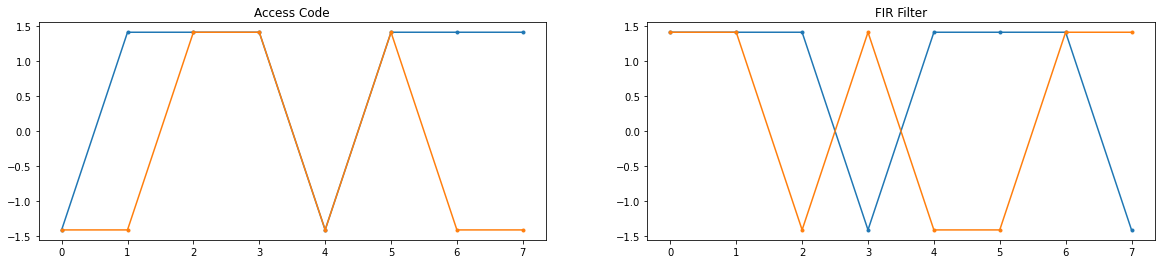

In [5]:
fig, (left, right) = plt.subplots(1, 2, figsize = (20, 4))

left.plot(np.real(syms), ".-")
left.plot(np.imag(syms), ".-")
left.set_title("Access Code")

right.plot(np.real(fir_syms), ".-")
right.plot(np.imag(fir_syms), ".-")
right.set_title("FIR Filter")

plt.show()

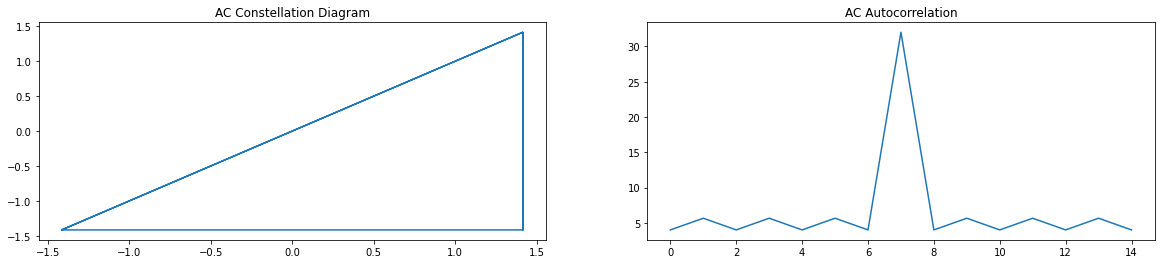

In [6]:
fig, (left, right) = plt.subplots(1, 2, figsize = (20, 4))

left.plot(np.real(syms), np.imag(syms))
left.set_title("AC Constellation Diagram")

xc = np.convolve(fir_syms, syms)
right.plot(np.abs(xc))
right.set_title("AC Autocorrelation")

plt.show()

## Symbols for 16-QAM

In [7]:
def modulate_16qam(m):
    sym = {}
    return map(lambda k: sym[k] if k in sym.keys() else None, m)

In [8]:
# convert into chunks of 4 bits for QPSK
# chunks = list(np.matmul(np.array(ac_pad).reshape((-1,4)), np.array([4, 3, 2, 1])))
# syms = list(modulate_16qam(chunks))

# print(chunks)
# print(syms)